In [4]:
%matplotlib inline

import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt

from plasmapy.formulary import  Maxwellian_speed_3D
from plasmapy.formulary.parameters import thermal_speed

# Thermal Speed

The thermal_speed function can be used to calculate the thermal velocity for a Maxwellian velocity distribution. There are three common definitions of the thermal velocity, which can be selected using the "method" keyword, which are defined for a 3D velocity distribution as


- 'most_probable' <br>
$v_{th} = \sqrt{\frac{2 k_B T}{m}}$

- 'rms' <br>
$v_{th} = \sqrt{\frac{3 k_B T}{m}}$

- 'mean_magnitude' <br>
$v_{th} = \sqrt{\frac{8 k_B T}{m\pi}}$

The differences between these definitions can be illustrated by plotting them on a 3D Maxwellian speed distribution

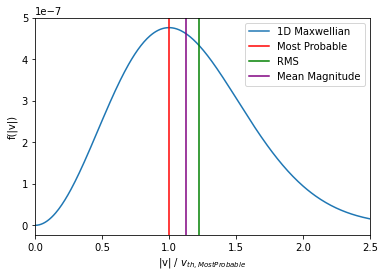

In [3]:
T = 1e5 * u.K

speeds = np.linspace(0, 8e6, num=600) * u.m/u.s
pdf = Maxwellian_speed_3D(speeds, T=T, particle='e')
v_most_prob = thermal_speed(T=T, particle='e-', method='most_probable')
v_rms = thermal_speed(T=T, particle='e-', method='rms')
v_mean_magnitude = thermal_speed(T=T, particle='e-', method='mean_magnitude')

plt.plot(speeds/v_most_prob, pdf, label='1D Maxwellian')
plt.xlim(0, 2.5)
plt.xlabel("|v| / $v_{th, Most Probable}$")
plt.ylabel("f(|v|)")
plt.axvline(x=v_most_prob/v_most_prob, color='red', label='Most Probable')
plt.axvline(x=v_rms/v_most_prob, color='green', label='RMS')
plt.axvline(x=v_mean_magnitude/v_most_prob, color='purple', label='Mean Magnitude')
plt.legend(loc='upper right')